In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
ROOT_DIR = os.getcwd()
DIR_PROJECT = ROOT_DIR +'\Imagens Utilizadas'
""" for dirname, _, filenames in os.walk(DIR_PROJECT):
    for filename in filenames:
        print(os.path.join(dirname, filename)) """

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

' for dirname, _, filenames in os.walk(DIR_PROJECT):\n    for filename in filenames:\n        print(os.path.join(dirname, filename)) '

In [3]:
import zipfile
import os
%pip install tensorflow
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import KFold



## Prepare Data


In [5]:
train_dir = DIR_PROJECT+"/train"
os.listdir(train_dir)

['COVID19', 'NORMAL']

In [6]:
test_dir = DIR_PROJECT+"/test"
os.listdir(test_dir)

['COVID19', 'NORMAL']

In [7]:
print(len(os.listdir(train_dir+"/COVID19")))
print(len(os.listdir(train_dir+"/NORMAL")))



400
400


In [8]:
print(len(os.listdir(test_dir+"/COVID19")))
print(len(os.listdir(test_dir+"/NORMAL")))



100
100


## Observing a sample image of each X-ray class


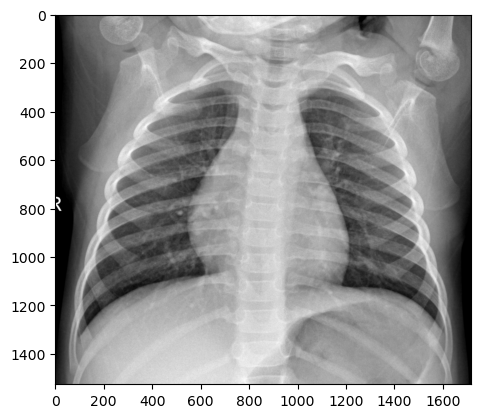

In [9]:
normal_sample = imread(train_dir+"/NORMAL"+"/NORMAL(976).jpg")
plt.imshow(normal_sample)


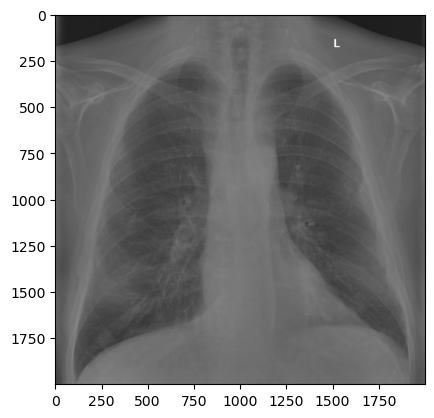

In [10]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(187).jpg")
plt.imshow(covid_sample, cmap= "gray")


In [11]:
image_size = (400,400,3)



## Image generator


## Training generator

In [12]:
train_generator = tf.keras.utils.image_dataset_from_directory (
    train_dir,
    image_size=image_size[:2],
    color_mode='rgb',
    class_names=['COVID19', 'NORMAL'],
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 800 files belonging to 2 classes.


## Testing generator

In [14]:
test_generator =tf.keras.utils.image_dataset_from_directory (
    test_dir,
    image_size=image_size[:2],
    color_mode='rgb',
    class_names=['NORMAL', 'COVID19'],
    batch_size=32,
    shuffle=False,
    interpolation='nearest',
)

Found 200 files belonging to 2 classes.


In [15]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)
train_images = np.concatenate(list(train_generator.map(lambda x, y:x)))
train_labels = np.concatenate(list(train_generator.map(lambda x, y:y)))

val_images = np.concatenate(list(test_generator.map(lambda x, y:x)))
val_labels = np.concatenate(list(test_generator.map(lambda x, y:y)))

inputs = np.concatenate((train_images, val_images), axis=0)
targets = np.concatenate((train_labels, val_labels), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

## Creating Model 3
### CNN with KFOLd

In [44]:
melhor_treino_medio=list()
melhor_history_medio=list()
melhor_scores_medio = list()
for train, test in kfold.split(inputs, targets):
  
  model = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255, input_shape=image_size),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 1024, activation = "relu"),
  tf.keras.layers.Dense(units = 24, activation = "softmax")])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=30,
              callbacks=[stop])
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  melhor_treino_medio.append(model)
  melhor_history_medio.append(history)
  melhor_scores_medio.append(scores)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 484ms/step - accuracy: 0.4660 - loss: 1.2415
Epoch 2/60


d:\Anaconda\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/step - accuracy: 0.6584 - loss: 0.6354
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 465ms/step - accuracy: 0.7331 - loss: 0.5281
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 467ms/step - accuracy: 0.7819 - loss: 0.4664
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 466ms/step - accuracy: 0.8432 - loss: 0.3698
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 477ms/step - accuracy: 0.8235 - loss: 0.3710
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 458ms/step - accuracy: 0.9290 - loss: 0.2210
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 466ms/step - accuracy: 0.9305 - loss: 0.1862
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.9115 - loss: 0.2103
Epoch 10/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 463ms/step - accuracy: 0.9517 - loss: 0.1321
Epoch 11/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 467ms/step - accuracy: 0.9387 - loss: 0.1293
Epoch 12/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 459ms/step - accuracy: 0.9670 - loss: 0.1025
Epoch 13/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 469ms/st

## Mean model by a accuracy mean

In [45]:
from statistics import mean
valor_medio=0
for modelo in melhor_history_medio:
    valor_medio+=mean(modelo.history['accuracy'])
valor_medio=valor_medio/len(melhor_history_medio)
valor_medio
final=[]
for i,modelo in enumerate(melhor_history_medio):
    if mean(modelo.history['accuracy'])>=valor_medio:
        print(i,modelo,mean(modelo.history['accuracy']))
        final.append(mean(modelo.history['accuracy']))
final=max(final)
point=0
for i,modelo in enumerate(melhor_history_medio):
    if mean(modelo.history['accuracy'])==final:
        final=modelo
        print(i)
        point=i
        break
history=final
model=melhor_treino_medio[point]
scores=melhor_scores_medio[point]

1 <keras.src.callbacks.history.History object at 0x0000020011ECF1D0> 0.9653749972581863
2 <keras.src.callbacks.history.History object at 0x00000200AB2AF1D0> 0.9627708335717519
1


In [46]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_37 (Rescaling)        │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 134, 134, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 134, 134, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 67, 67, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 67, 67, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_114 (Conv2D)             │ (None, 23, 23, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 11, 11, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_115 (Conv2D)             │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_115               │ (None, 2, 2, 32)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_37 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 24)             │        24,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,546 (2.02 MB)

 Trainable params: 176,408 (689.09 KB)

 Non-trainable params: 320 (1.25 KB)

 Optimizer params: 352,818 (1.35 MB)

## Visualize Training


dict_keys(['accuracy', 'loss'])


<Axes: >

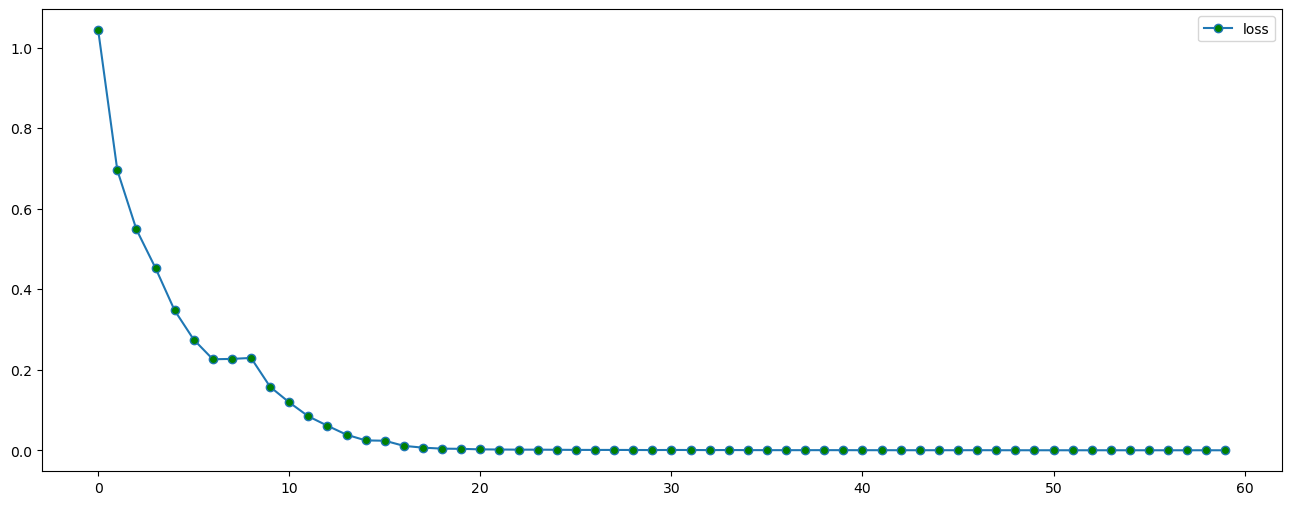

In [47]:
print(history.history.keys())
pd.DataFrame(history.history)[["loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<Axes: >

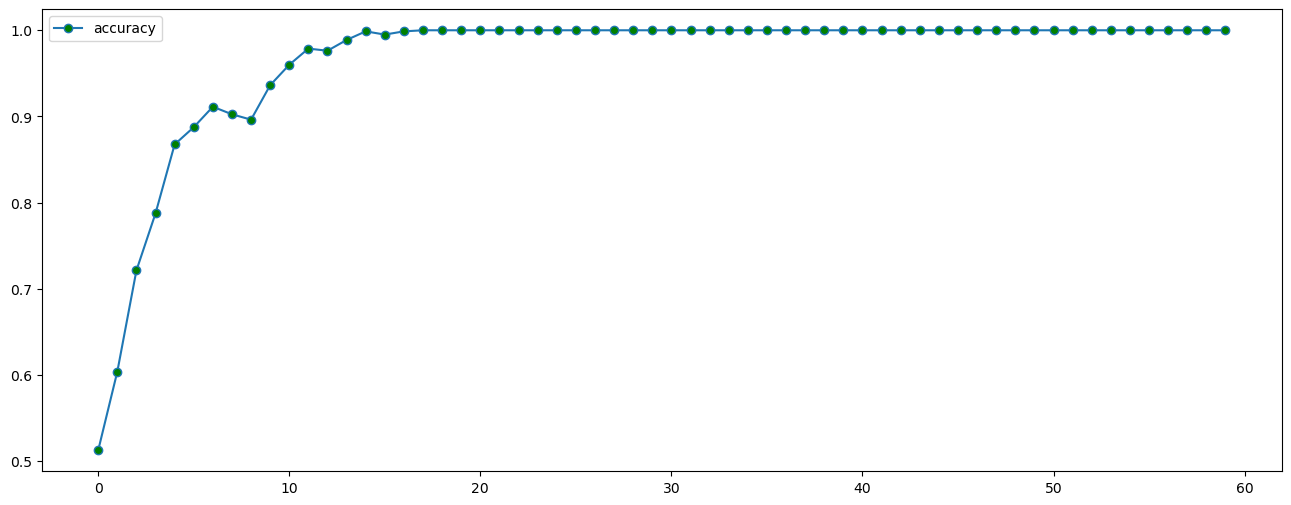

In [48]:
pd.DataFrame(history.history)[["accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

## predict

In [49]:
predictions = model.predict(test_generator)
predictions



7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 624ms/step


array([[9.99976516e-01, 2.34380768e-05, 1.66606381e-10, ...,
        5.31067856e-10, 2.10683304e-10, 2.32754135e-10],
       [9.99999881e-01, 1.07557469e-07, 6.35849392e-13, ...,
        2.21580377e-13, 7.62312034e-14, 3.01565820e-13],
       [9.99997854e-01, 2.11981728e-06, 4.95458327e-11, ...,
        1.02915731e-10, 1.89111938e-11, 5.94649885e-11],
       ...,
       [1.59301955e-04, 9.99839664e-01, 2.40120901e-08, ...,
        2.46885570e-08, 2.69392899e-08, 5.49748123e-08],
       [3.25522342e-05, 9.99963641e-01, 1.57915281e-07, ...,
        1.67153686e-07, 1.78282917e-07, 2.42123662e-07],
       [2.81083412e-05, 9.99971747e-01, 7.72476394e-09, ...,
        8.70825900e-09, 3.78529919e-09, 1.36803004e-08]], dtype=float32)

In [50]:
pred_labels = np.argmax(predictions, axis = 1)


## Random Image testing


In [51]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/COVID19")))
random_covid_image_name = os.listdir(train_dir+"/COVID19")[random_index]
random_covid_image_name

'COVID19(113).jpg'

In [52]:
covid_img_path = train_dir+"/COVID19/"+random_covid_image_name


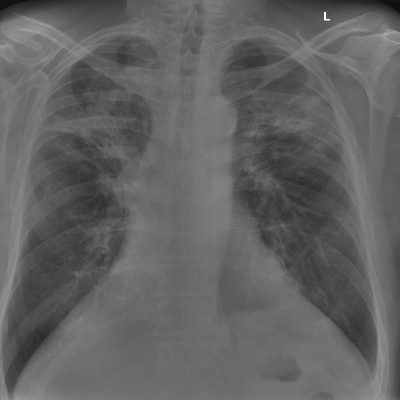

In [53]:
random_covid_img = image.load_img(covid_img_path, target_size=image_size)
random_covid_img

In [54]:
random_covid_img_array = image.img_to_array(random_covid_img)
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)
covid_img_array.shape



(1, 400, 400, 3)

In [55]:
result=np.argmax(model.predict(covid_img_array), axis =1)
result


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step


array([0], dtype=int64)